<h2> Home Credit Default Risk </h2>

In [38]:
# libraries
import os

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [19]:
# list content of datadir
print(os.listdir('/datadisk/datafiles/kaggle/home_credit_default_risk/'))

['bureau.csv', 'credit_card_balance.csv', 'POS_CASH_balance.csv', 'installments_payments.csv.zip', 'credit_card_balance.csv.zip', 'application_train.csv', 'previous_application.csv', 'application_train.csv.zip', 'previous_application.csv.zip', 'application_test.csv.zip', 'HomeCredit_columns_description.csv', 'bureau.csv.zip', 'bureau_balance.csv.zip', 'POS_CASH_balance.csv.zip', 'sample_submission.csv.zip', 'bureau_balance.csv', 'installments_payments.csv', 'application_test.csv', 'sample_submission.csv']


In [32]:
# read in datafiles
application_train = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/application_train.csv')
# credit_card_balance = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/credit_card_balance.csv')
# POS_CASH_balance = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/POS_CASH_balance.csv')
# bureau = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/bureau.csv')
# bureau_balance = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/bureau_balance.csv')
# installments_payments = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/installments_payments.csv')
application_test = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/application_test.csv')
# previous_application = pd.read_csv('/datadisk/datafiles/kaggle/home_credit_default_risk/previous_application.csv')


In [33]:
# get info
applicants.head()
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [34]:
# check missings
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(50)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


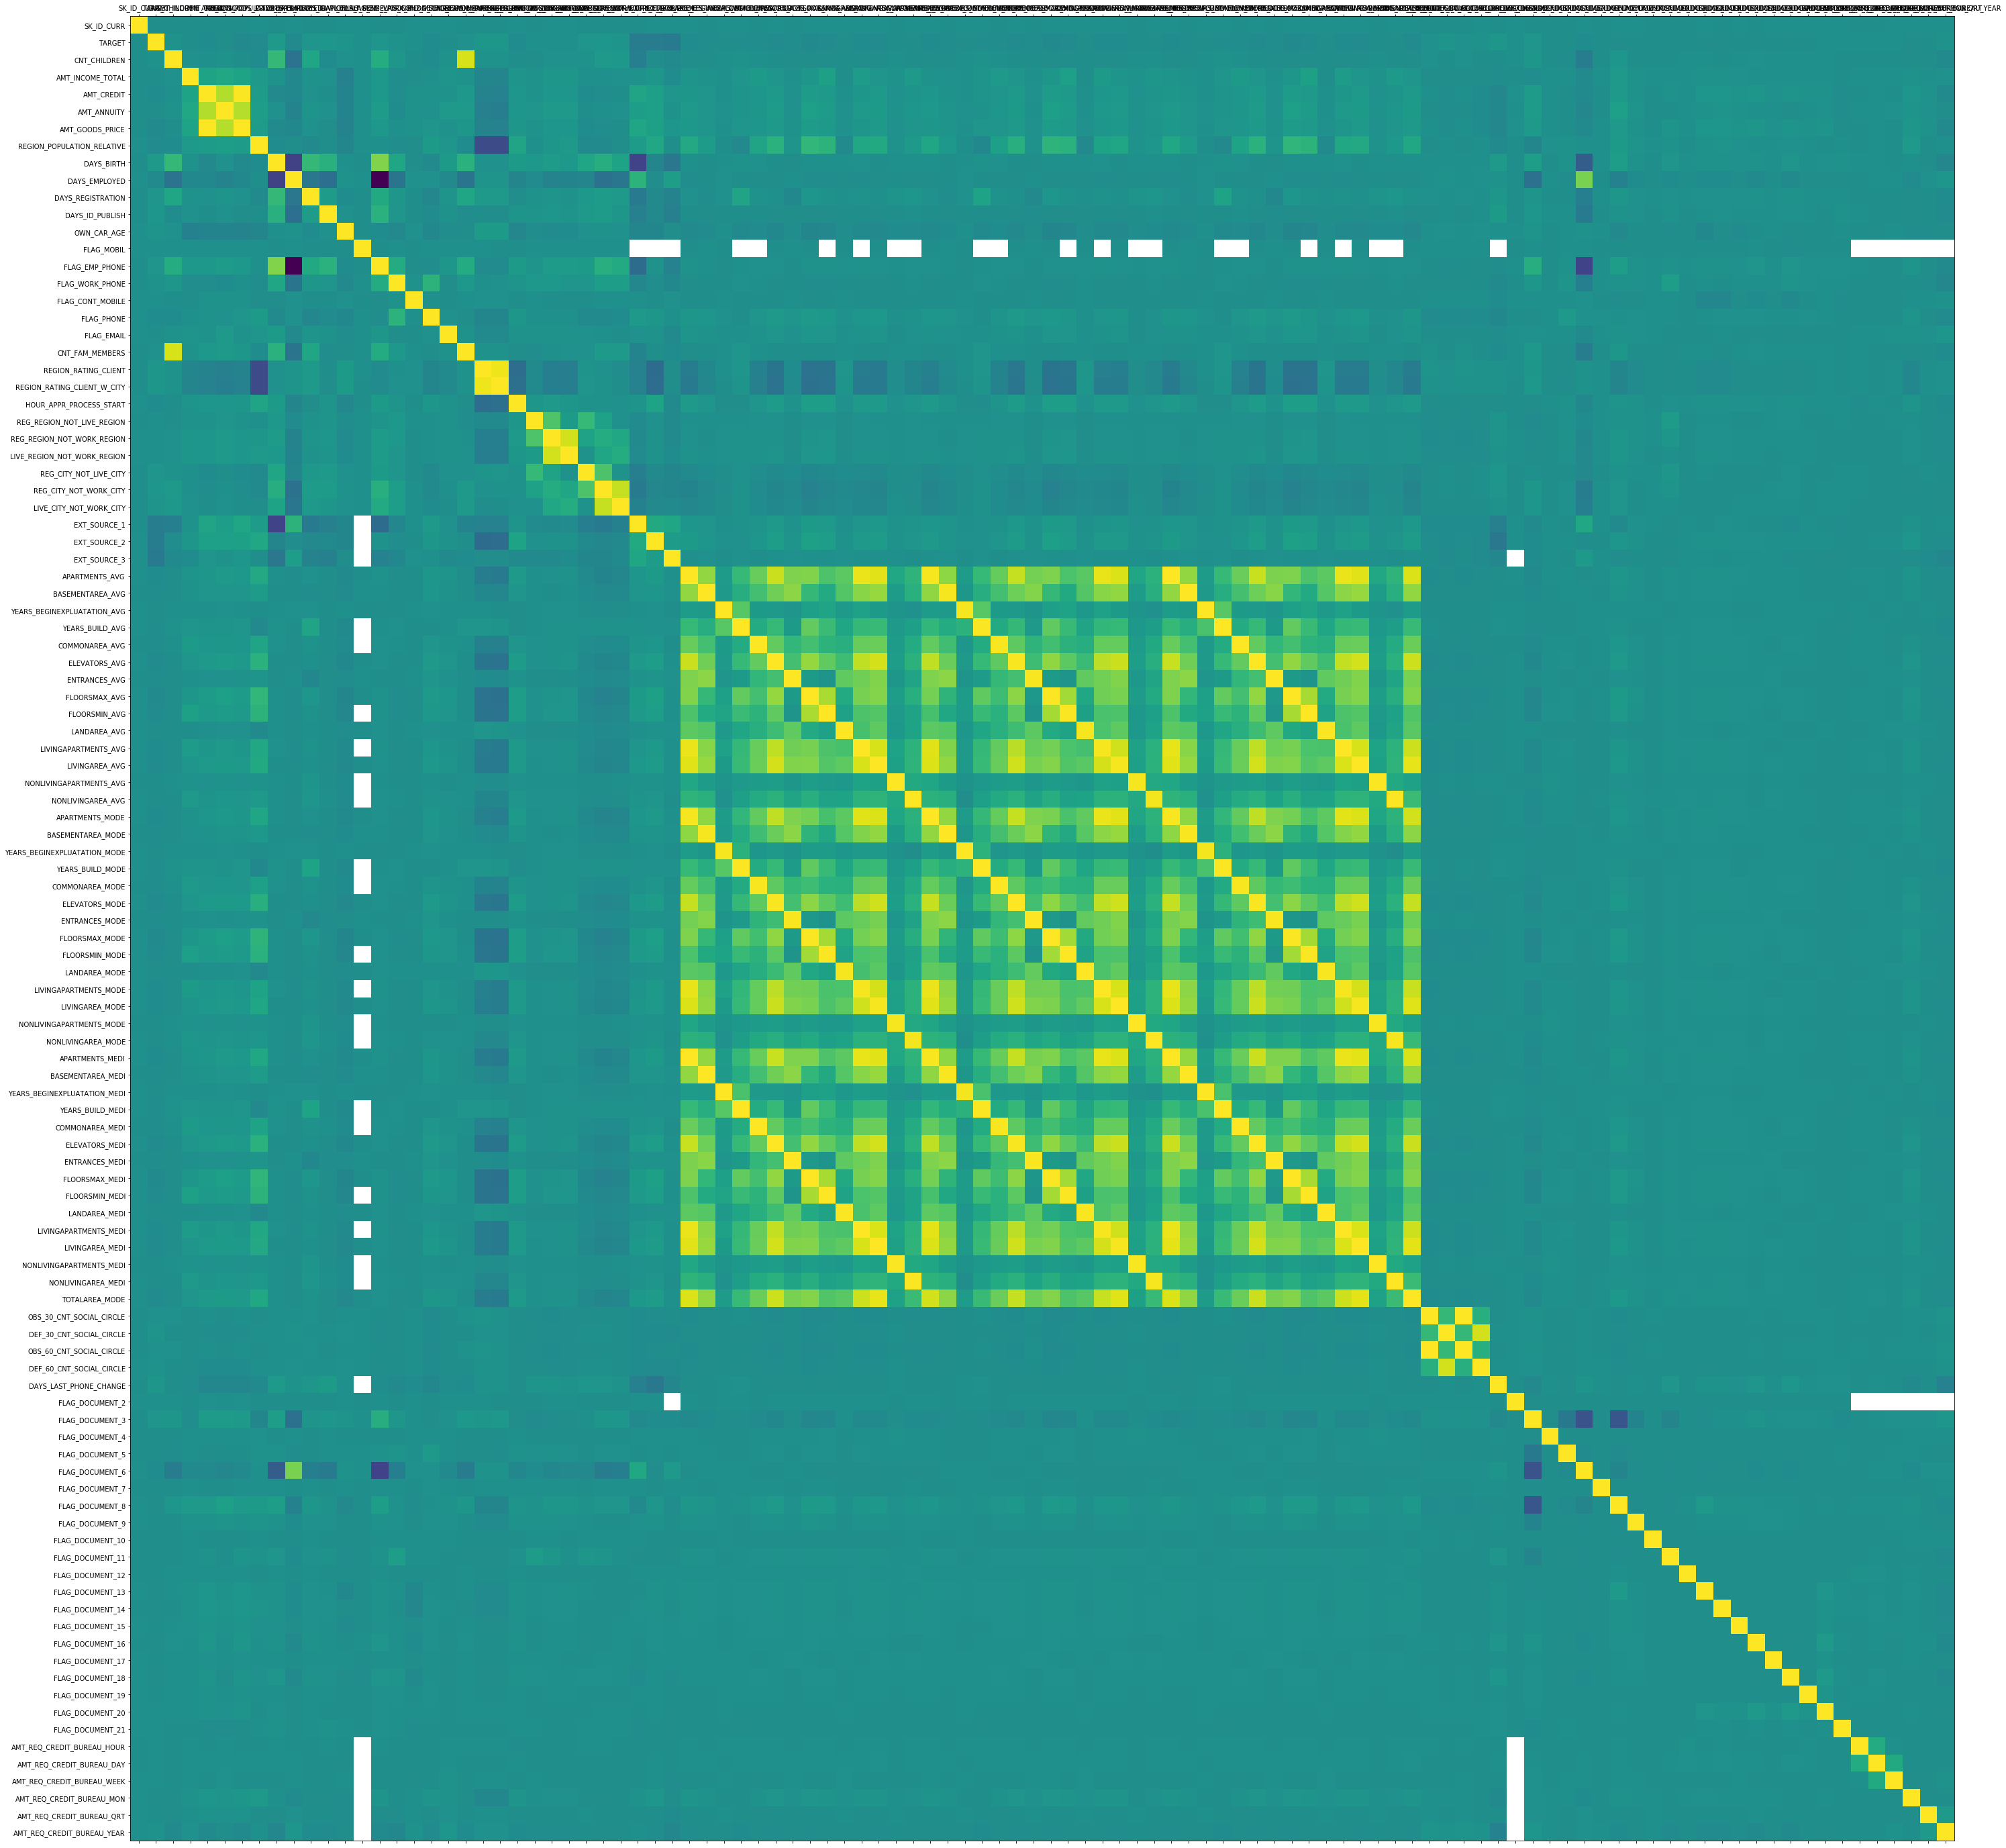

In [29]:
# pearson correlation of variables
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(application_train, size = 50)


In [35]:
# preprocessing
from sklearn import preprocessing
categorical_feats = [
    f for f in application_train.columns if application_train[f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))


In [36]:
# fill missing
application_train.fillna(-666, inplace = True)

In [39]:
# # Random forest classifier
# rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
# rf.fit(application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1), application_train.TARGET)
# features = application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [46]:
# importance = rf.feature_importances_
# importance

array([1.06060961e-03, 1.35149773e-02, 1.36865529e-03, 2.11280980e-04,
       7.05350165e-04, 5.51614193e-03, 9.83348568e-03, 1.30363170e-02,
       1.06900914e-02, 1.09643335e-03, 6.36334886e-03, 1.84401040e-02,
       1.48895318e-03, 1.43815625e-03, 4.51299619e-03, 4.76941413e-02,
       2.09786914e-02, 1.10256412e-02, 1.40027081e-02, 3.97513285e-03,
       0.00000000e+00, 2.40245399e-03, 3.87306796e-04, 1.02255257e-04,
       2.00526321e-04, 2.96554987e-04, 2.41179333e-03, 1.84091672e-03,
       1.00086054e-03, 2.17329046e-03, 1.46575523e-03, 3.10790066e-03,
       8.09029374e-05, 2.06632945e-04, 8.17859946e-05, 2.38317596e-03,
       4.71864270e-04, 2.53811603e-04, 7.15257422e-03, 7.06953663e-02,
       3.35827396e-01, 3.09608126e-01, 1.11266848e-03, 9.00125637e-04,
       1.35351361e-03, 6.72389130e-04, 8.38400908e-04, 5.00729489e-04,
       1.10124798e-03, 3.78222470e-04, 7.40801189e-04, 1.46285263e-03,
       5.67971943e-04, 1.30604992e-03, 6.18116414e-04, 1.05874719e-03,
      

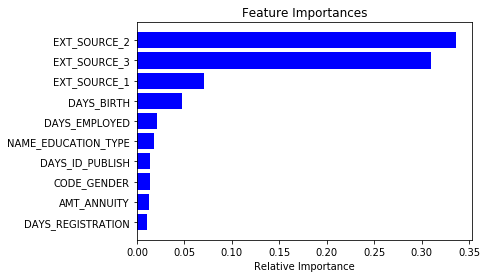

In [101]:
# # feature importance
# importances = rf.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(111,121), importances[indices][-10::], color='b', align='center')
# plt.yticks(range(111,121), features[indices][-10::])
# plt.xlabel('Relative Importance')
# plt.show()

In [120]:
# # Predicting the results
# y_pred = rf.predict(application_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1))
# y_test = application_train['TARGET'].values

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# cm

array([[282686,      0],
       [ 24825,      0]])

In [125]:
# light gbm method
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = application_test
app_train = application_train

app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

In [126]:
# final train and test set
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

In [127]:
# validation set
x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [128]:
# light gbm
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.744574
[400]	valid_0's auc: 0.752219
[600]	valid_0's auc: 0.755954
[800]	valid_0's auc: 0.757236
[1000]	valid_0's auc: 0.758094
[1200]	valid_0's auc: 0.758592
[1400]	valid_0's auc: 0.758702
[1600]	valid_0's auc: 0.758796
[1800]	valid_0's auc: 0.75883
Early stopping, best iteration is:
[1707]	valid_0's auc: 0.758919


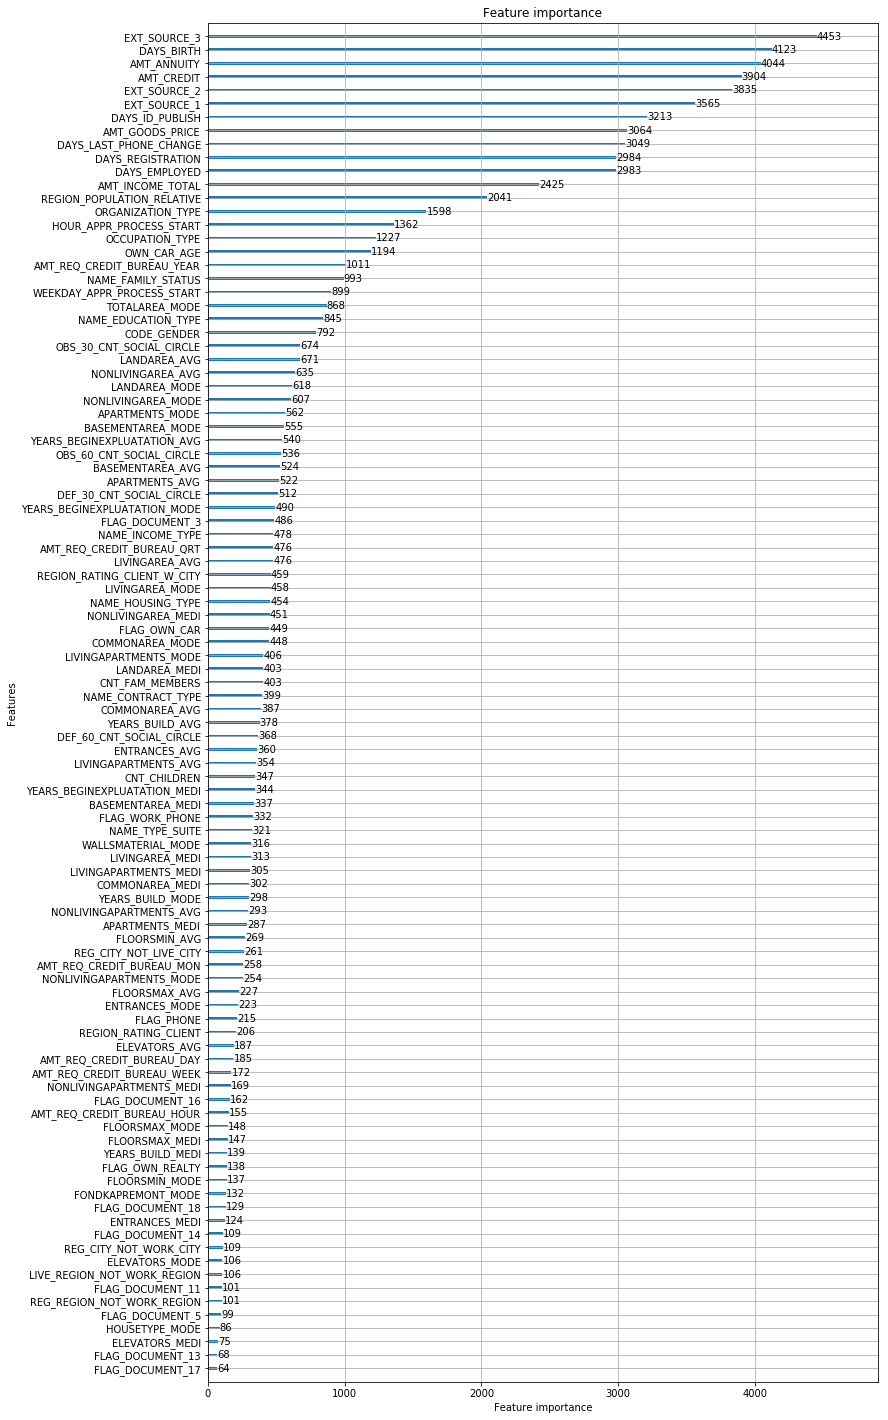

In [129]:
lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);

In [130]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.026611
1,100005,0.117440
2,100013,0.018282
3,100028,0.036869
4,100038,0.123837


In [131]:
sub_lgb.to_csv("results-first-try.csv", index=False)